# Step 3 Calculating interaction of randomly generated particles in 3D space

In [1]:
import numpy as np
from scipy.special import lpmn, factorial
from multipole import Vlm
from multipole import operation as op

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('ggplot')
def plot_3d(x):
    """plot particles in 3 dimentional"""
    y = np.transpose(x)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(y[0], y[1], y[2])
    ax = ax.view_init(30)
    plt.show()
    return 

In [3]:
#case 3 construction
num_particles = 1000
x_i = np.ndarray(shape=(3, num_particles))
x_i[0] = 20 * np.random.rand(num_particles) - 10
x_i[1] = 20 * np.random.rand(num_particles) - 10
x_i[2] = 20 * np.random.rand(num_particles) - 10
x_i = np.transpose(x_i)
q = np.ones(num_particles)

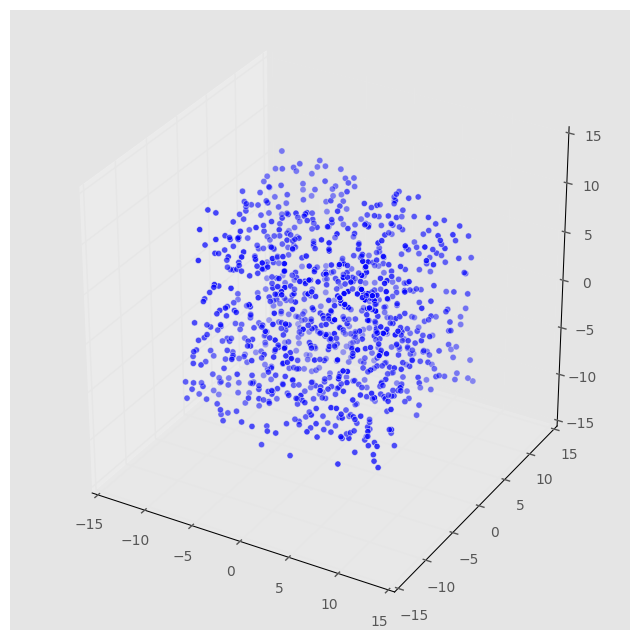

In [4]:
plot_3d(x_i)

In [5]:
[x0_i, scale_factor] = op.cartesian_scaling_to_unit_range(x_i)

In [6]:
# analytical answer
pair_potential = np.zeros(shape=(num_particles,num_particles)) 
for i in range(0, num_particles):
    for j in range(i+1, num_particles):
        pair_potential[i][j] = 1 / (op.distance_cal(x0_i[i], x0_i[j]) * scale_factor[1])

In [7]:
J_analytic = np.zeros(num_particles)
for i in range(0, num_particles):
    J_i = 0
    for j in range(0,i):
        J_i += pair_potential[j][i]
    for j in range(i+1, num_particles):
        J_i += pair_potential[i][j]
    J_analytic[i] = J_i

J_analytic

array([ 104.61858922,   71.23672725,   94.14123711,   78.5938201 ,
        105.99467544,   84.34276443,   88.95481422,   95.77277138,
         88.77124622,  101.65215764,   83.66622389,   83.2895311 ,
        121.60542804,  108.64234449,   86.1002868 ,  119.81620008,
         92.66104063,  117.37805193,  109.32889179,   77.81228694,
         89.34633167,  101.5588244 ,   95.41044084,  110.98885409,
        104.89857964,  106.64554323,  102.35916308,   86.93433326,
         94.7079492 ,   90.26323627,   75.40589363,  101.44769323,
         83.05686396,   96.34109053,   91.60580565,  115.69926484,
         92.26480794,  102.55048709,   99.796331  ,   76.20578011,
         71.54489499,  107.6600004 ,   96.62280163,   96.46688758,
         86.46943914,   91.98707391,   78.73371544,  103.7867922 ,
        100.3773253 ,  108.55879557,   75.74459904,   98.00534142,
        117.04445534,  127.96627559,   83.44388072,   98.52203864,
        115.03260202,   89.9823133 ,   97.00476157,  100.32822

In [8]:
total_energy = 0.5 * sum(J_analytic)
total_energy

48065.065897769178

In [9]:
from multipole import fmm_level as fl
from multipole import fmm_q_source as fq

In [10]:
# build list of q_source
q_source = np.ndarray(shape=(len(x_i)), dtype=fq) 
for i in range(0, len(x0_i)):
    q_source[i] = fq(x0_i[i], q[i])

In [11]:
fmm_level_3 = fl(3, q_source, 5)

In [12]:
f_level_2 = fmm_level_3.lower_level_construction()

In [13]:
f_level_1 = f_level_2.lower_level_construction()

In [14]:
f_level_2.box_list[0].NN_box_id_set

{1,
 2,
 4,
 5,
 6,
 8,
 9,
 10,
 16,
 17,
 18,
 20,
 21,
 22,
 24,
 25,
 26,
 32,
 33,
 34,
 36,
 37,
 38,
 40,
 41,
 42}

In [15]:
f_level_2.interactions_box_id_set(0)

{3,
 7,
 11,
 12,
 13,
 14,
 15,
 19,
 23,
 27,
 28,
 29,
 30,
 31,
 35,
 39,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63}

In [16]:
f_level_2.box_interactions()

In [17]:
f_level_0 = f_level_1.lower_level_construction()

There is no lower_level


In [18]:
f_level_2.box_list[5].Mlm.Vp

array([[  2.43718126e+02 -4.51564845e-19j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j],
       [  8.85936390e-01 +2.44911370e-18j,
          6.68176298e-01 +1.14500928e+01j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j],
       [  2.96001444e-01 -1.08939620e-19j,
          1.98229569e-02 +2.83821627e-02j,
         -1.94749240e-01 +3.64389195e-02j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j,
          0.00000000e+00 +0.00000000e+00j],
       [ -8.85701406e-04 -5.67821723e-21j,
          2.42745852e-03 +2.89181323e-02j,
          4.71167632e-05 +1.04773606e-03j,
         -7.43328141e-04 -6.65373999e-04j,
          0.00000000e+00 +0.00000000e+00j,
        